<a href="https://colab.research.google.com/github/Myung-gyoLee/NIRspectroscopy/blob/main/1_preprocess_regress_2401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aquagrams https://nirpyresearch.com/aquagrams-python-matplotlib/

smoothing의 목적: 실제 스펙트럼 신호를 (이상적으로) 보존하면서 임의의 노이즈를 제거하는 것

In [ ]:
### install packages on drive
import os, sys
# from google.colab import drive
# drive.mount('/content/drive')

my_path = '/content/package'
# save_path = '/content/drive/MyDrive/Colab Notebooks/package' ## 패키지가 저장될 경로

# os.symlink(save_path, my_path)
# sys.path.insert(0, my_path)

# ! pip install --target=$my_path livelossplot
# ! pip install --target=$my_path tensorflow_addons
# ! pip install --target=$my_path tensorflow
# ! pip install --target=$my_path optuna
# ! pip install --target=$my_path boxsers
# ! pip install  colab_ssh --upgrade
# !pip install --target=$my_path kennard-stone
# !pip install --target=$my_path astartes
#### failed
# !pip install --target=$my_path spectrochempy
!pip install --target=$my_path chemotools

  Using cached chemotools-0.1.3-py3-none-any.whl (7.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 111.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 35.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
li

In [ ]:
from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
launch_ssh_cloudflared(password='0000')

ModuleNotFoundError: No module named 'colab_ssh'

In [14]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/package'
save_path = '/content/drive/MyDrive/Colab Notebooks/package'

# os.symlink(save_path, my_path)
sys.path.insert(0, my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Chem/ipynb')
from plotting_utils import *

In [ ]:
# import library
# Readjust cell width in Jupyter
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import sys
from sys import stdout
import logging

import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import clear_output
import logging
import tqdm

import scipy.io as sio
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback,  ModelCheckpoint
from tensorflow.keras.utils import plot_model
import tensorflow_addons as tfa
from boxsers.misc_tools import data_split

## Use liveslossplot for training visualization in real time
from livelossplot import PlotLossesKerasTF

import optuna

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Check for version of packages
print('Tensorflow ', tf.__version__)
print('Tensorflow add-ons ', tfa.__version__)
print('tqdm ', tqdm.__version__)
print('Numpy ', np.__version__)
print('Pandas', pd.__version__)
print('Optuna ', optuna.__version__)
# print('livelossplot ', livelossplot.__version__)

Tensorflow  2.15.0
Tensorflow add-ons  0.23.0
tqdm  4.66.1
Numpy  1.23.5
Pandas 1.5.3
Optuna  3.5.0


In [ ]:
## Define random seeds ir order to maintain reproducible results through multiple testing phases
def reproducible_comp():
    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

reproducible_comp()

### Read data spectrum & ages breaker

In [ ]:
import pickle
import glob
import pandas as pd
import numpy as np

# with open('/content/drive/MyDrive/Colab Notebooks/Chem/data/pickle/raw_O350_n289.pickle', "rb") as fr:
#      waveD = pickle.load(fr)


# # get wave number
# # import numpy as np
# # wl = np.linspace(3952.0, 11560.0, 952)
# # print(wl)

# # y = df.columns
# # print(y)

# wl952 = np.linspace(11560.0, 3952.0,  952).tolist()
# wl949 = np.linspace(11536.0, 3952.0,  949).tolist()

# # print(set(wl952) - set(wl949)) # {11544.0, 11552.0, 11560.0}

# # df = pd.DataFrame(waveD['ospec'])
# # print(df)
# # dict_keys(['z0000', 'z0001_2'])
# ## dict_keys(['ospec', 'spdata'])
# z1 = pd.DataFrame(waveD['z0000']['ospec'])
# z2 = pd.DataFrame(waveD['z0001_2']['ospec'])
# print(z1.head())

# ### cut spectrum same 0000 and 0001,0002
# nwaveD = {"x0": z1[1:-1],
#           "wl0": wl949[1: -1],
#           "x1": z2[3:-1],
#           "wl1": wl952[3:-1]}

# print(nwaveD['x0'].shape, len(nwaveD['wl0']))
# # prompt: pandas change index
# nwaveD['x0'].index = nwaveD['wl0']
# nwaveD['x1'].index = nwaveD['wl1']
# X = pd.concat([nwaveD['x0'], nwaveD['x1']], axis = 1)
# X= X.dropna()
# y = X.columns
# spd = {'X':X, 'y':y}
# # Save the object to a file
# with open("/content/drive/MyDrive/Colab Notebooks/Chem/data/pickle/rawO350_n289_mod.pickle", "wb") as fw:
#      pickle.dump(spd, fw)

with open('/content/drive/MyDrive/Colab Notebooks/Chem/data/pickle/rawO350_n289_mod.pickle', "rb") as fr:
     spd= pickle.load(fr)

# print(X_test.shape, y.shape)

X = spd["X"]
y = spd["y"]
print(y)
print(X)
################################################################################
### import ages breaker

# path = 'f:/GAC_KSY/spectrum/1_amaranth/data/AGEs_breaker'
# mat_files = glob.glob(path + "/*.xlsx")
# df_list = [pd.read_excel(file, sheet_name=None, index_col=[0,1]) for file in mat_files]
# df_list[0]["MGO-AGEs"]["avg"]
# df_list[1]["MGO"]
# df_list[2]["MGO-AGEs"]
# with open("../pickle/ages_breaker.pickle", "wb") as fw:
#     pickle.dump(df_list, fw)
# agesdf = df_list[3]['MGO-AGEs']
# agesdf = agesdf.rename(columns={'ave': 'avg'})
# df1 = pd.concat([agesdf, df_list[0]['MGO-AGEs']])
# df1 = pd.concat([df1, df_list[1]["MGO"]])
# mgodf = pd.concat([df1, df_list[2]['MGO-AGEs']])
# with open("/content/drive/MyDrive/Colab Notebooks/Chem/data/pickle/ages_breaker.pickle", "wb") as fw:
#      pickle.dump(mgodf, fw)
with open('/content/drive/MyDrive/Colab Notebooks/Chem/data/pickle/ages_breaker.pickle', "rb") as fr:
     ageD = pickle.load(fr)

print(ageD)

In [ ]:
# ageD.keys()
# dict_keys(['MGO-AGEs', 'GO-AGEs', 'GA-AGEs'])
ll = [int(col.split("_")[1].replace("O","")) for col in X.columns]
ll = list(set(ll))
ll.sort()


ll2 = ageD['GA-AGEs'].reorder_levels([1,0])['ave'].loc["25μg/ml"].index.tolist()
samplel = list(set(ll) & set(ll2))
print(samplel)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 32, 33, 34, 35, 36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 122, 123, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 339, 340, 341, 342, 343, 344, 345, 346, 348, 350]


In [ ]:
# split ageD["MGO-AGEs"] with first index of dual index
avg25 = pd.DataFrame()
avg50 = pd.DataFrame()
for key in ageD.keys():
  avg25[key] = ageD[key].reorder_levels([1,0])['ave'].loc["25μg/ml"].loc[samplel]
  avg50[key] = ageD[key].reorder_levels([1,0])['ave'].loc["50μg/ml"].loc[samplel]

avg25.columns = [col + '_25μg/ml' for col in avg25.columns]
avg50.columns = [col + '_50μg/ml' for col in avg50.columns]

# avg25 and avg50 dataframe concat

agesdf = pd.concat([avg25, avg50], axis=1)
agesdf['sample'] = [ln for ln in agesdf.index]

agesdf = pd.concat([avg25, avg50], axis=1)
agesdf['sample'] = [ln for ln in agesdf.index]
mergedf = X.T
mergedf["sample"] = [int(col.split("_")[1].replace("O","")) for col in X.columns]
# print(mergedf.sample)

mergedf = mergedf.merge(agesdf, on='sample', how='left')
# slicing
mergedf.iloc[:, :947]

,11528.0,11520.0,11512.0,11504.0,11496.0,11488.0,11480.0,11472.0,11464.0,11456.0,...,4032.0,4024.0,4016.0,4008.0,4000.0,3992.0,3984.0,3976.0,3968.0,3960.0
0,0.147675,0.146993,0.146662,0.146405,0.146158,0.146043,0.145922,0.145623,0.145175,0.144664,...,0.578892,0.582648,0.585241,0.586777,0.587449,0.587491,0.587056,0.586136,0.584678,0.582739
1,0.136970,0.136705,0.136549,0.136192,0.135568,0.135073,0.135003,0.134946,0.134498,0.133993,...,0.569898,0.573729,0.576438,0.578106,0.578886,0.579034,0.578779,0.578100,0.576882,0.575228
2,0.137785,0.137420,0.137215,0.137066,0.136729,0.136369,0.136265,0.136264,0.136041,0.135541,...,0.591336,0.595012,0.597555,0.599049,0.599681,0.599683,0.599220,0.598321,0.596946,0.595132
3,0.214400,0.213599,0.212828,0.211976,0.211194,0.210802,0.210737,0.210613,0.210264,0.209809,...,0.607066,0.610925,0.613709,0.615475,0.616471,0.616965,0.617070,0.616706,0.615757,0.614285
4,0.180130,0.179522,0.179080,0.178741,0.178270,0.177659,0.177267,0.177269,0.177268,0.176861,...,0.557210,0.560895,0.563504,0.565099,0.565913,0.566206,0.566065,0.565461,0.564400,0.562911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.174719,0.174100,0.173942,0.173927,0.173596,0.173507,0.173900,0.173915,0.173284,0.172719,...,0.559780,0.563636,0.566551,0.568611,0.569887,0.570536,0.570730,0.570481,0.569721,0.568484
887,0.181100,0.180655,0.180262,0.179969,0.179589,0.179260,0.179118,0.178907,0.178614,0.178464,...,0.575833,0.579479,0.582276,0.584374,0.585837,0.586699,0.587067,0.587032,0.586583,0.585682
888,0.180872,0.180549,0.180261,0.180045,0.179732,0.179478,0.179369,0.179251,0.178871,0.178394,...,0.571275,0.574765,0.577426,0.579420,0.580768,0.581494,0.581745,0.581632,0.581131,0.580193
889,0.172752,0.172614,0.172488,0.172325,0.171840,0.171344,0.171382,0.171532,0.171254,0.170716,...,0.581285,0.585059,0.587947,0.590030,0.591367,0.592038,0.592206,0.591961,0.591277,0.590188


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 947 entries, 11528.0 to 3960.0
Columns: 891 entries, AMA_O001_20231121_153908.0000 to AMA_O350_20231228_095528.0002
dtypes: float64(891)
memory usage: 6.4 MB
None


## Shapiro-Wilk Test

In [ ]:
import pickle


# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
data = X.dropna().to_numpy()
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.781, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### The Kennard-Stone algorithm
 dividing a dataset into at least two groups: a calibration subset and a validation subset. The calibration set is used to fit the model, while the validation set is used to check that the trained model works as intended on a set of unknown data. The split into calibration and validation can be done randomly or according to some predefined criterion.

 https://nirpyresearch.com/kennard-stone-algorithm/


In [ ]:
!pip install kennard-stone
!pip install astartes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kennard_stone as ks
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_validate
from astartes import train_val_test_split
from sklearn.feature_selection import VarianceThreshold
# from sklearn.model_selection import train_test_split/

In [ ]:
# Remove features with no variance
# vselector = VarianceThreshold(threshold=0.0)
# X = vselector.fit_transform(df.T)

# spliting train, test
X_train, X_test, y_train, y_test = ks.train_test_split(X.T, mergedf['sample'], test_size = 0.2)
# X_train, X_test, m25_train, m25_test = ks.train_test_split(X, mgo25, test_size = 0.2)
# X_train, X_test, m50_train, m50_test = ks.train_test_split(X, mgo50, test_size = 0.2)

split_set = {}
# mergedf.columns[:947]
for age in [age for age in mergedf.columns[947:]]:
    X_train, X_test, y_train, y_test = ks.train_test_split(X.T, mergedf[age], test_size = 0.2)
    split_set[age] = [X_train, X_test, y_train, y_test]

Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.


In [ ]:
# data_ages = data_dict["data_ages"]
# X_train, X_test, y_train, y_test = ks.train_test_split(X, y, test_size = 0.2)
data_dict = {'mergedf': mergedf,
             'agesdf' : agesdf,
            'X': X.T,
            'y': y,
            'wl': X.index,
             'split_set': split_set,
            'X_train': X_train,
            'X_test' : X_test,
            'y_train' : y_train,
            'y_test' : y_test }

with open('/content/drive/MyDrive/Colab Notebooks/Chem/data/pickle/data_dict.pickle', "wb") as fw:
    pickle.dump(data_dict, fw)


In [16]:
import pickle
import pandas as pd

with open('/content/drive/MyDrive/Colab Notebooks/Chem/data/pickle/data_dict.pickle', "rb") as fr:
    data_dict = pickle.load(fr)

 check the result by plotting how spectra and primary values have been divided by the KS method

sample


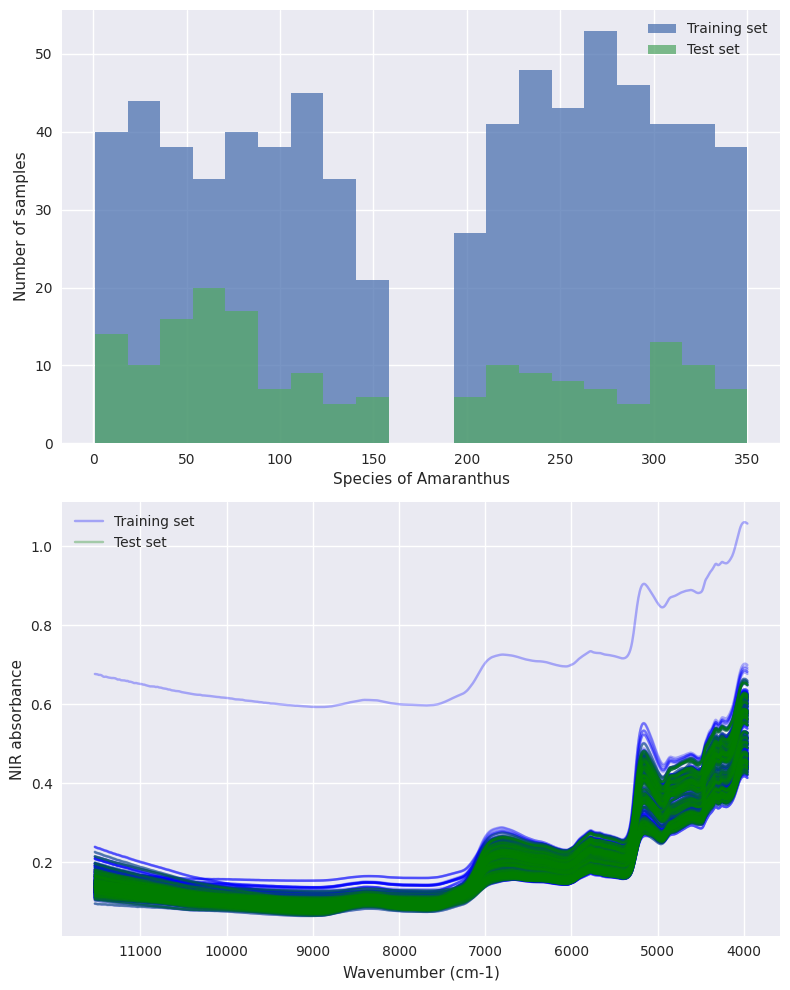

MGO-AGEs_25μg/ml


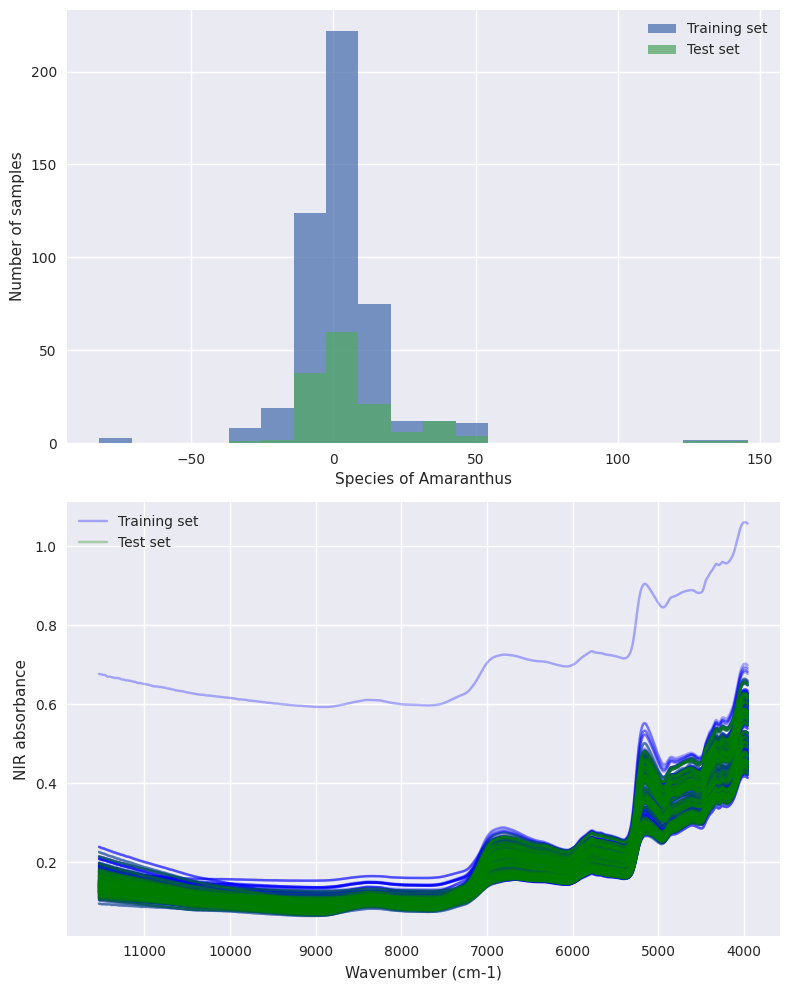

GO-AGEs_25μg/ml


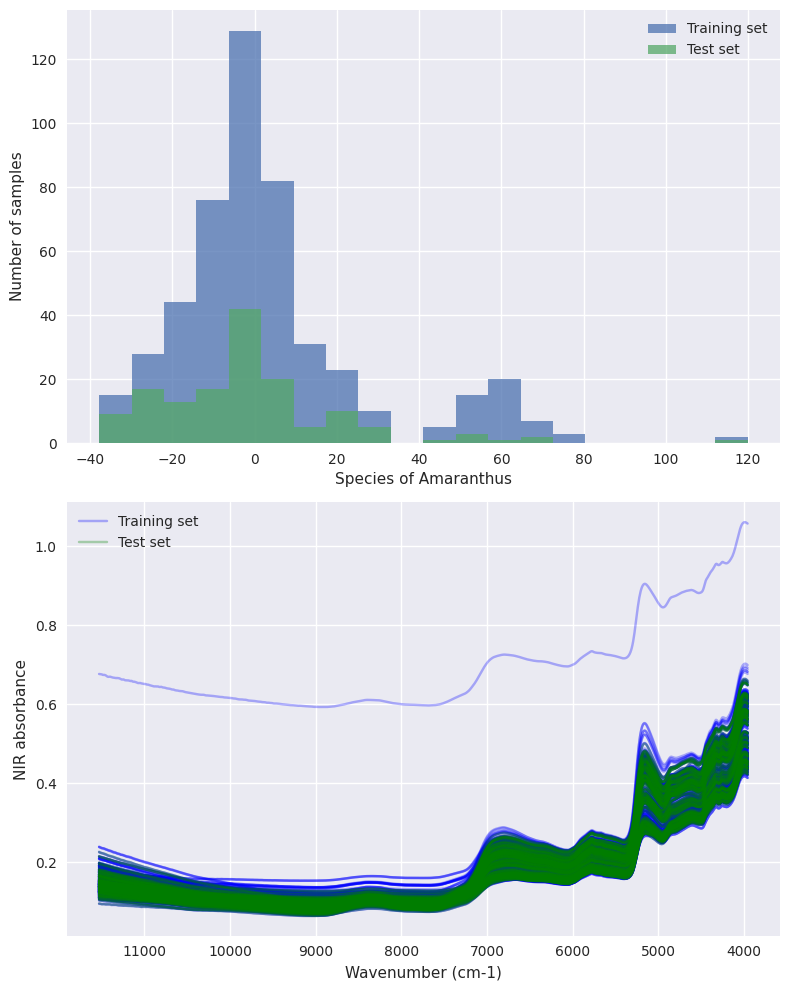

GA-AGEs_25μg/ml


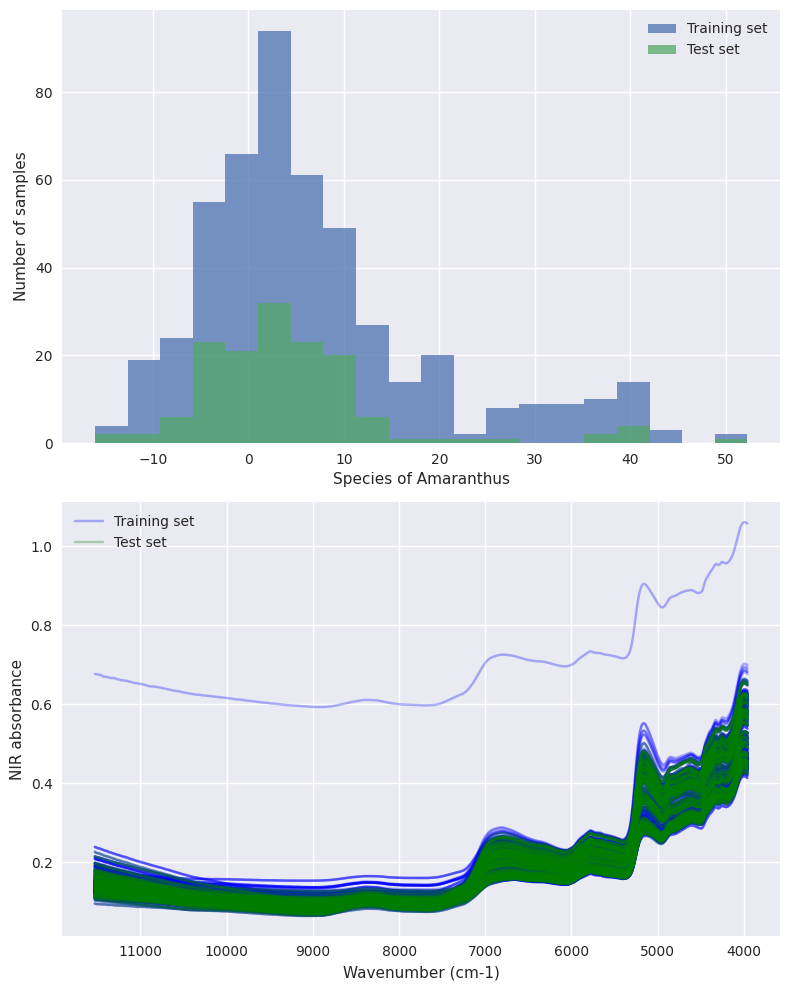

MGO-AGEs_50μg/ml


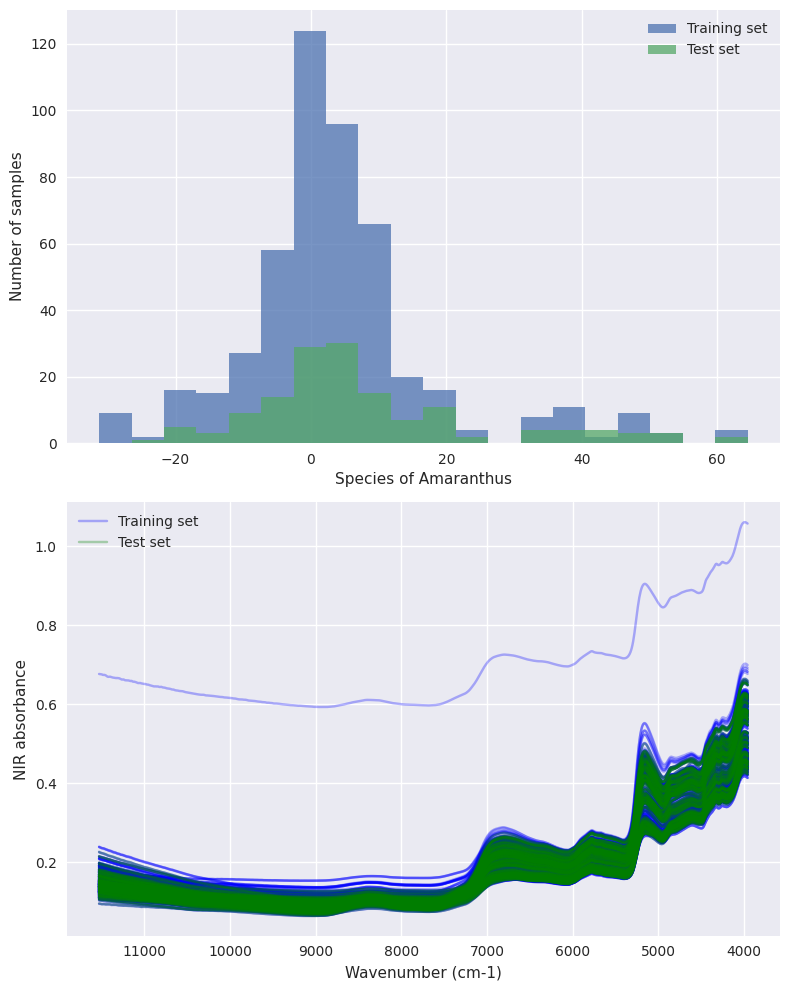

GO-AGEs_50μg/ml


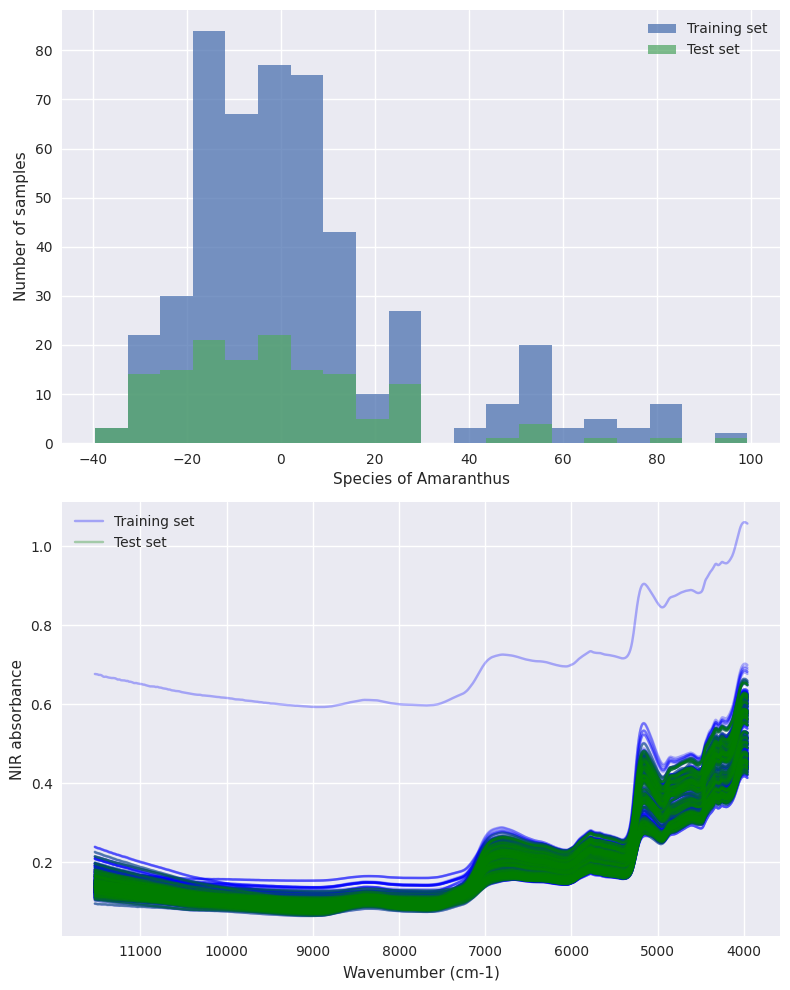

GA-AGEs_50μg/ml


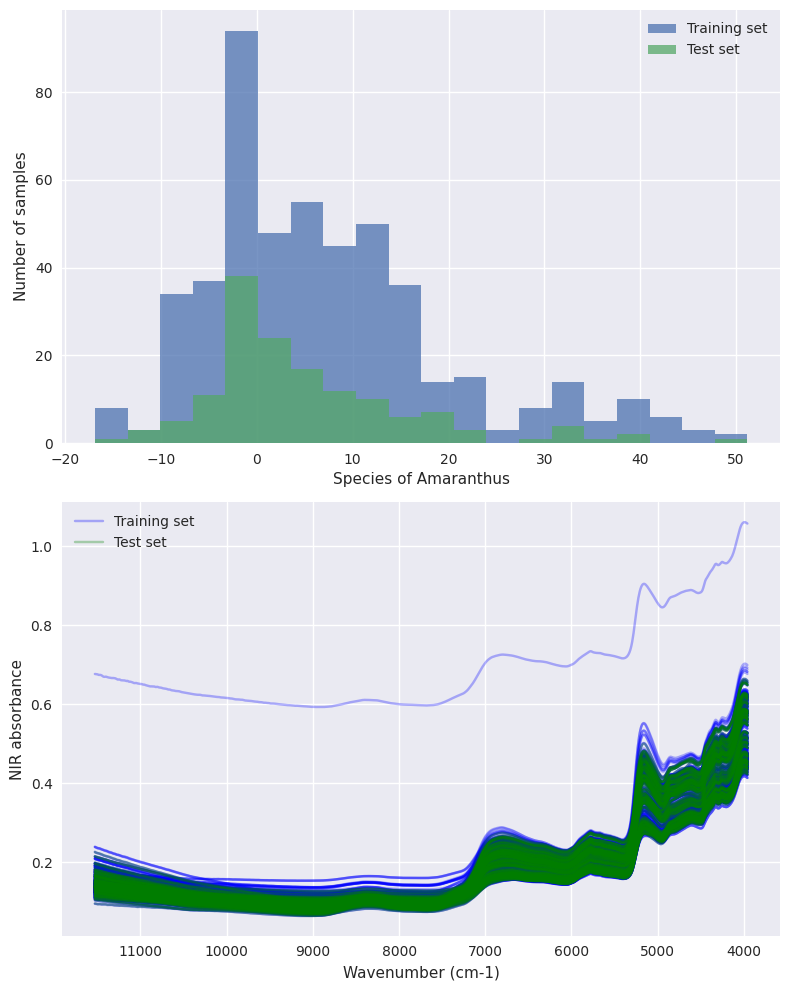

In [ ]:
for k, sets in split_set.items():
    print(k)
    with plt.style.context(('seaborn')):
        f, axs = plt.subplots(2,1,figsize=(8,10))
        n, bins, patches = axs[0].hist(sets[2], bins = 20, alpha=0.75, label="Training set")
        axs[0].hist(sets[3], bins = bins, alpha=0.75, label="Test set")
        axs[0].legend()
        axs[0].set_xlabel("Species of Amaranthus")
        axs[0].set_ylabel("Number of samples")

        train_legend =  np.repeat("_Training set", sets[0].shape[0])
        train_legend[0] = "Training set"
        test_legend =  np.repeat("_Test set", sets[1].shape[0])
        test_legend[0] = "Test set"

        axs[1].plot(wl, sets[0].T, 'b', alpha=0.3, label = train_legend)
        axs[1].plot(wl, sets[1].T, 'g', alpha=0.3, label = test_legend)
        axs[1].legend()
        axs[1].set_xlabel("Wavenumber (cm-1)")
        axs[1].set_ylabel("NIR absorbance")
        axs[1].invert_xaxis()
    plt.tight_layout()
    plt.show()



https://paucablop.github.io/chemotools/get-started/brewing_regressor.html


In [ ]:
# !pip install chemotools
# from chemotools.datasets import load_fermentation_train

# spectra, hplc = load_fermentation_train()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 3.7 MB/s eta 0:00:00


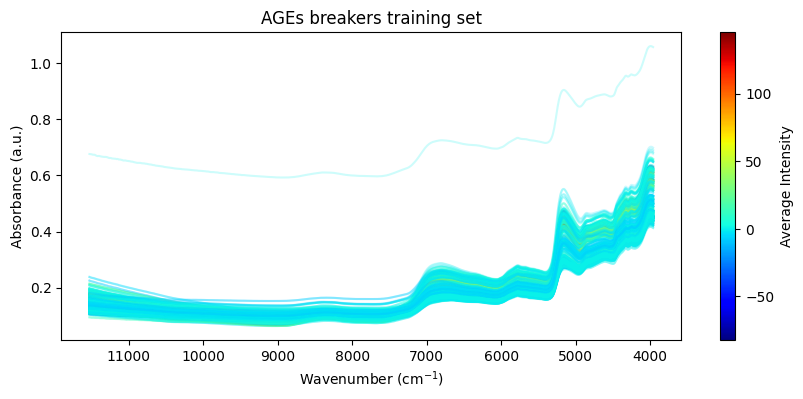

In [21]:
import numpy as np
from matplotlib.colors import Normalize

sys.path.append('/content/drive/MyDrive/Colab Notebooks/Chem/ipynb')
from plotting_utils import *

# [age for age in mergedf.columns[947:]]
# ['sample',
#  'MGO-AGEs_25μg/ml',
#  'GO-AGEs_25μg/ml',
#  'GA-AGEs_25μg/ml',
#  'MGO-AGEs_50μg/ml',
#  'GO-AGEs_50μg/ml',
#  'GA-AGEs_50μg/ml']

spectra = data_dict['mergedf'].iloc[:,:947]
# Convert the spectra pandas.DataFrame to numpy.ndarray
spectra_np = spectra.to_numpy()
# Convert the wavenumbers pandas.columns to numpy.ndarray
wn = spectra.columns.to_numpy(dtype=np.float64)
# Convert the hplc pandas.DataFrame to numpy.ndarray
assay = data_dict['mergedf']['MGO-AGEs_25μg/ml'].fillna(0)
assay = assay.to_numpy()


plot_spectra(spectra_np, wn, assay)
# cmap = plt.get_cmap("nipy_spectral")



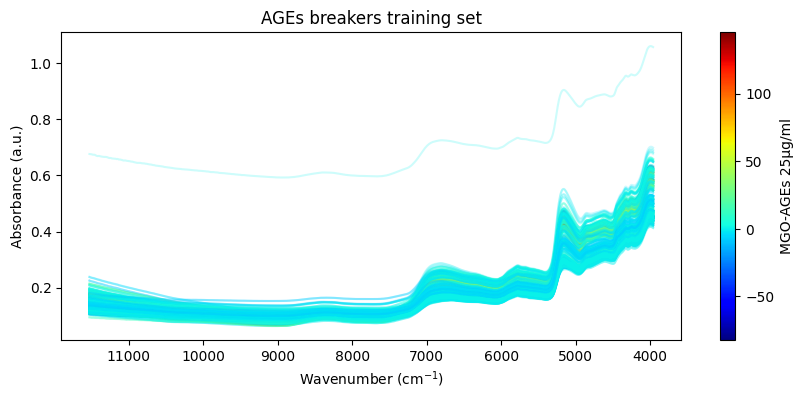

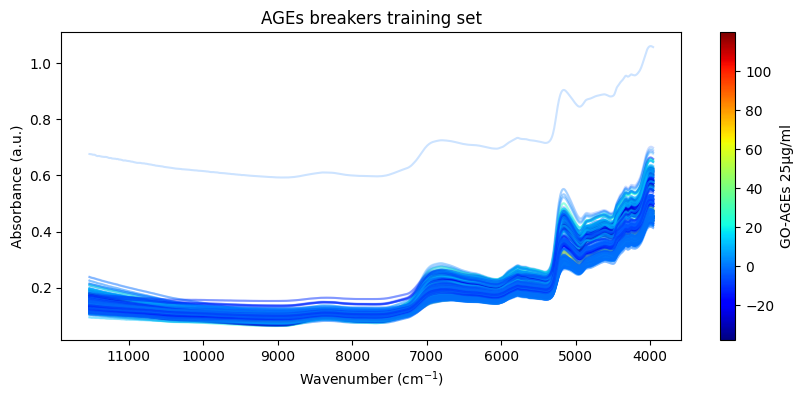

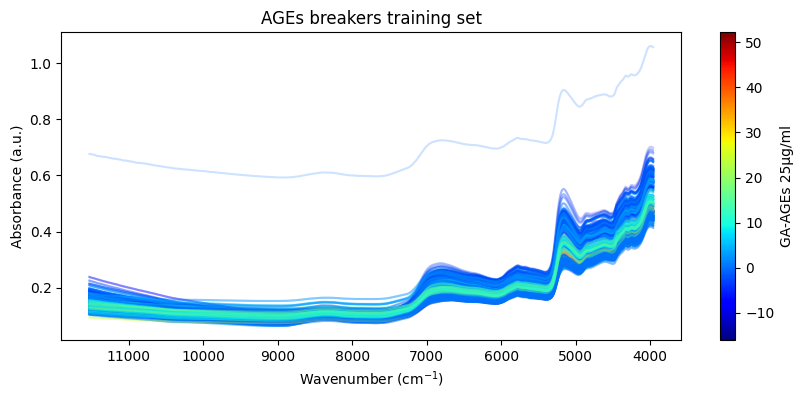

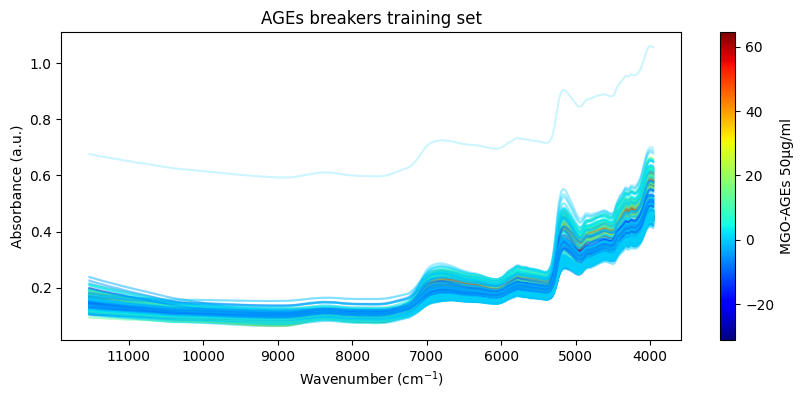

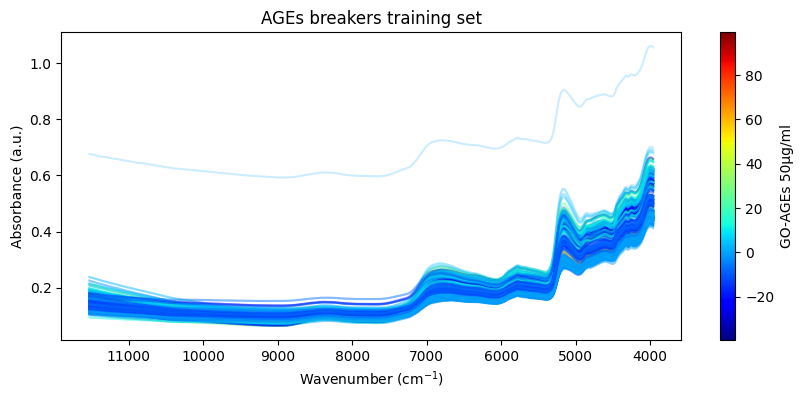

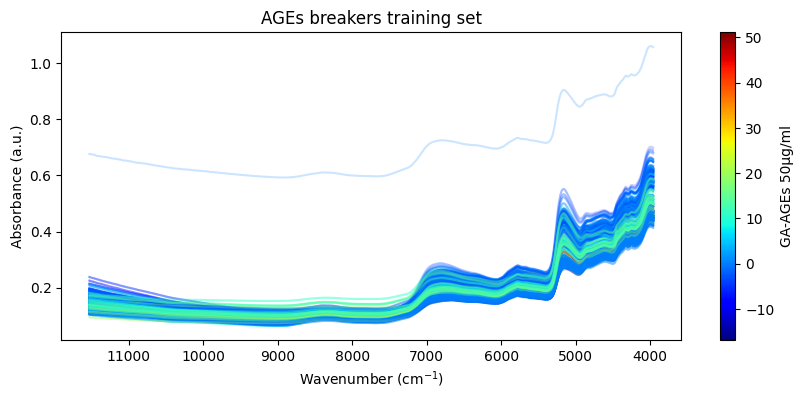

In [32]:
import numpy as np
from matplotlib.colors import Normalize
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Chem/ipynb')
from plotting_utils import *
# [age for age in mergedf.columns[947:]]
# ['sample',
#  'MGO-AGEs_25μg/ml',
#  'GO-AGEs_25μg/ml',
#  'GA-AGEs_25μg/ml',
#  'MGO-AGEs_50μg/ml',
#  'GO-AGEs_50μg/ml',
#  'GA-AGEs_50μg/ml']

spectra = data_dict['mergedf'].iloc[:,:947]
# Convert the spectra pandas.DataFrame to numpy.ndarray
spectra_np = spectra.to_numpy()
# Convert the wavenumbers pandas.columns to numpy.ndarray
wn = spectra.columns.to_numpy(dtype=np.float64)
# Convert the hplc pandas.DataFrame to numpy.ndarray
for key in  [
  'MGO-AGEs_25μg/ml',  'GO-AGEs_25μg/ml',  'GA-AGEs_25μg/ml',
  'MGO-AGEs_50μg/ml',  'GO-AGEs_50μg/ml',  'GA-AGEs_50μg/ml']:
  assay = data_dict['mergedf'][key].fillna(0)
  assay = assay.to_numpy()
  cmap = plt.get_cmap("jet")

  # Define a normalization function to scale glucose concentrations between 0 and 1
  normalize = Normalize(vmin=assay.min(), vmax=assay.max())
  colors = [cmap(normalize(value)) for value in assay]

  # colors = [cmap(np.interp(np.array(hplc, dtype='float64'), (hplc.min(), hplc.max()), (0, 1)))]

  # Plot the spectra
  fig, ax = plt.subplots(figsize=(10, 4))
  for i, row in enumerate(spectra_np):
      ax.plot(wn, row, color=colors[i], alpha = 0.2)
      ax.invert_xaxis()

  # Add a colorbar
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
  sm.set_array([])
  fig.colorbar(sm, ax=ax, label=key.replace("_"," "))

  # Add labels
  ax.set_xlabel('Wavenumber (cm$^{-1}$)')
  ax.set_ylabel('Absorbance (a.u.)')
  ax.set_title('AGEs breakers training set')

  plt.show()
  # cmap = plt.get_cmap("nipy_spectral")



CROSS-VALIDATION
The Kennard-Stone algorithm can be used to generate a KFold cross-validation. For instance, here’s how we can print the number of folds (check our post on K-fold, Montecarlo and Bootstrap methods for more info)

In [ ]:
kf = ks.KFold(n_splits=5)
for train, test in kf.split(X):
    print("Train:", y[train],"  Test:", y[test])

# {'fit_time': array([0.29241204, 0.0147512 , 0.01529384, 0.01557493, 0.01391602]), 'score_time': array([0.0030036 , 0.00200009, 0.0030117 , 0.00400543, 0.00399804]), 'test_score': array([-345.2081557 , -364.16073274, -309.94461443, -335.36983775,
#       -390.9346513 ])}


Train: E14_230528_193137.0000     14
E14_230528_193137.0001     14
E14_230528_193137.0002     14
E16_230528_154105.0000     16
E16_230528_154105.0001     16
                           ..
E098_230612_134546.0000    98
E098_230612_134546.0001    98
E098_230612_134546.0002    98
E099_230612_102805.0001    99
E099_230612_102805.0002    99
Name: Sample, Length: 201, dtype: int32   Test: E23_230528_192805.0000          23
E4_230528_153310.0001            4
E7_230528_194107.0002            7
E002_230606_171321.0002          2
E007_230606_173245.0000          7
E009_230606_192730.0002          9
E016_230606_144055.0000         16
E017_230606_170630.0002         17
E019_230606_144519.0001         19
E020_230606_141613.0001         20
E021(양적음)_230606_193857.0002    21
E025_230606_141345.0002         25
E029_230606_193234.0002         29
E032(양적음)_230606_142003.0000    32
E034_230606_154939.0001         34
E035_230606_165447.0000         35
E038_230606_191916.0002         38
E040_230606_172309.0

In [ ]:
!pip install chemotools.variable_selection

ERROR: Could not find a version that satisfies the requirement chemotools.variable_selection (from versions: none)
ERROR: No matching distribution found for chemotools.variable_selection


In [ ]:
import chemotools

In [ ]:
#from chemotools.variable_selection import RangeCut
from chemotools.baseline import LinearCorrection
from chemotools.derivative import SavitzkyGolay

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# create a pipeline that scales the data
preprocessing = make_pipeline(
    #RangeCut(start=950, end=1500, wavelength=wavenumbers),
    LinearCorrection(),
    SavitzkyGolay(window_size=15, polynomial_order=2, derivate_order=1),
    StandardScaler(with_std=False)
)

In [33]:
#  X_train, X_test, y_train, y_test

spc_preprocess = preprocessing.fit_transform(split_set['MGO-AGEs_25μg/ml'][0])


GA-AGEs_50μg/ml


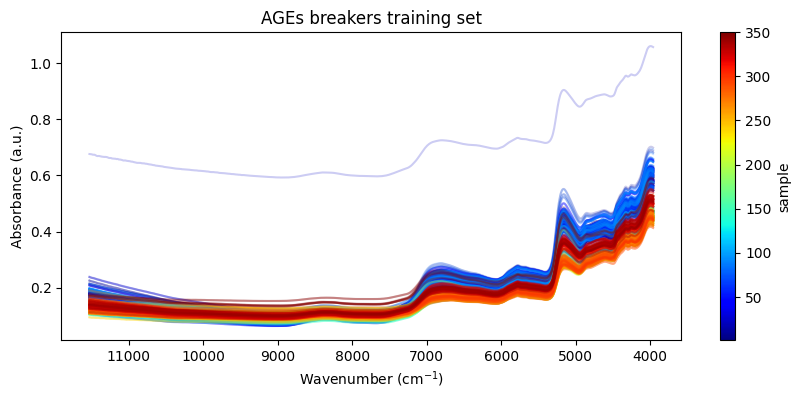

GA-AGEs_50μg/ml


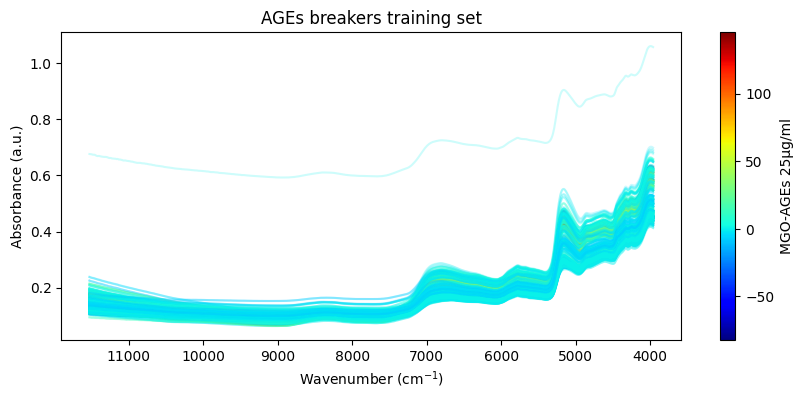

GA-AGEs_50μg/ml


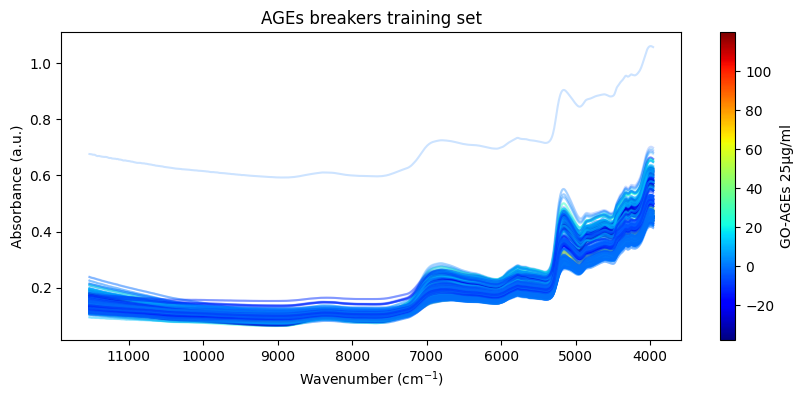

GA-AGEs_50μg/ml


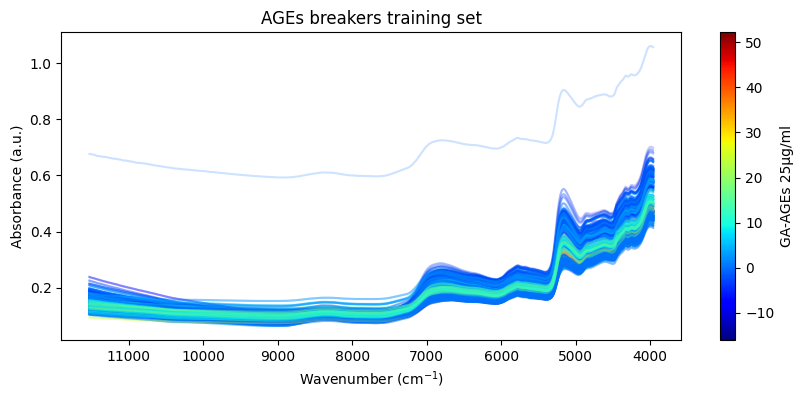

GA-AGEs_50μg/ml


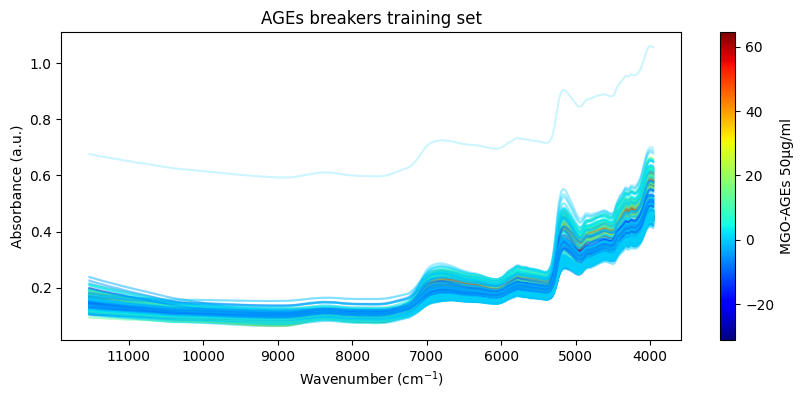

GA-AGEs_50μg/ml


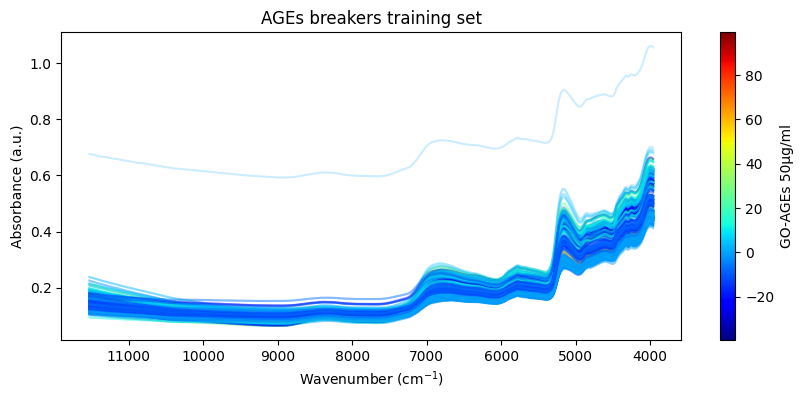

GA-AGEs_50μg/ml


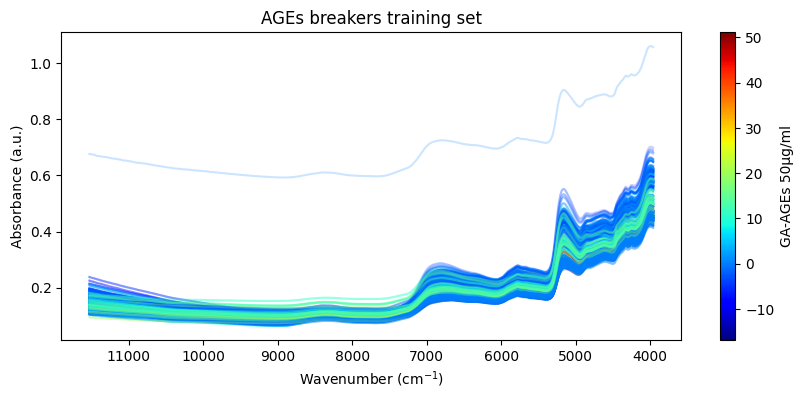

In [34]:
## get the wavenumbers after the range cut
# start_index = preprocessing.named_steps['rangecut'].start
# end_index = preprocessing.named_steps['rangecut'].end
# wavenumbers_cut = wavenumbers[start_index:end_index]

# plot the preprocessed spectra
for key, sets in split_set.items():
  print(key)
  assay = data_dict['mergedf'][key].fillna(0)
  assay = assay.to_numpy()
  cmap = plt.get_cmap("jet")

  # Define a normalization function to scale glucose concentrations between 0 and 1
  normalize = Normalize(vmin=assay.min(), vmax=assay.max())
  colors = [cmap(normalize(value)) for value in assay]

  # colors = [cmap(np.interp(np.array(hplc, dtype='float64'), (hplc.min(), hplc.max()), (0, 1)))]

  # Plot the spectra
  fig, ax = plt.subplots(figsize=(10, 4))
  for i, row in enumerate(spectra_np):
      ax.plot(wn, row, color=colors[i], alpha = 0.2)
      ax.invert_xaxis()

  # Add a colorbar
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
  sm.set_array([])
  fig.colorbar(sm, ax=ax, label=key.replace("_"," "))

  # Add labels
  ax.set_xlabel('Wavenumber (cm$^{-1}$)')
  ax.set_ylabel('Absorbance (a.u.)')
  ax.set_title('AGEs breakers training set')

  plt.show()

Training a PLS model


sample
Best parameters:  {'n_components': 25}
Best score:  27.553825702271503
Axes(0.125,0.11;0.775x0.77)

MGO-AGEs_25μg/ml
ValueError MGO-AGEs_25μg/ml
Best parameters:  {'n_components': 12}
Best score:  7.49382397834403
Axes(0.125,0.11;0.775x0.77)

GO-AGEs_25μg/ml
ValueError GO-AGEs_25μg/ml
Best parameters:  {'n_components': 11}
Best score:  12.067845879908386
Axes(0.125,0.11;0.775x0.77)

GA-AGEs_25μg/ml
ValueError GA-AGEs_25μg/ml
Best parameters:  {'n_components': 11}
Best score:  6.859288674774246
Axes(0.125,0.11;0.775x0.77)

MGO-AGEs_50μg/ml
ValueError MGO-AGEs_50μg/ml
Best parameters:  {'n_components': 13}
Best score:  6.674350288533644
Axes(0.125,0.11;0.775x0.77)

GO-AGEs_50μg/ml
ValueError GO-AGEs_50μg/ml
Best parameters:  {'n_components': 8}
Best score:  12.251540530261504
Axes(0.125,0.11;0.775x0.77)

GA-AGEs_50μg/ml
ValueError GA-AGEs_50μg/ml
Best parameters:  {'n_components': 10}
Best score:  7.0056149026601755
Axes(0.125,0.11;0.775x0.77)


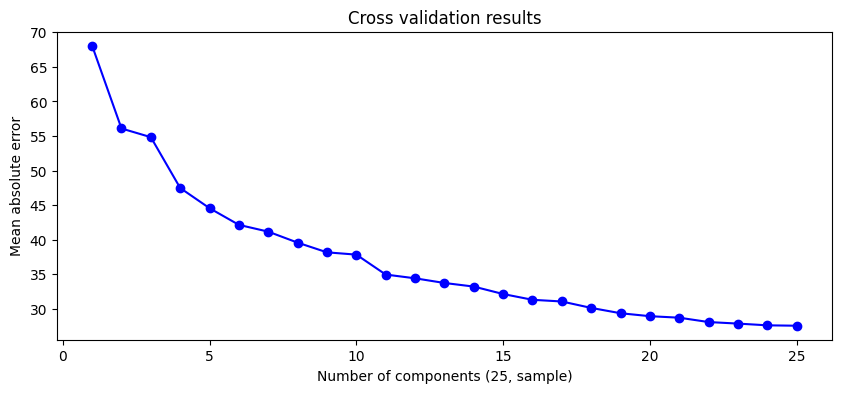

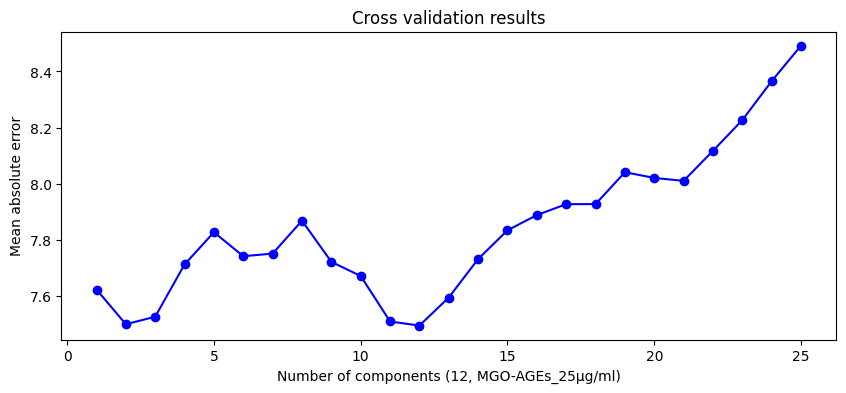

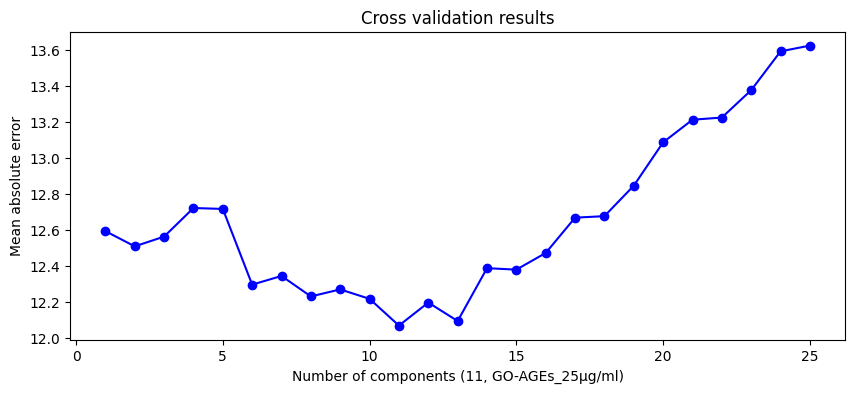

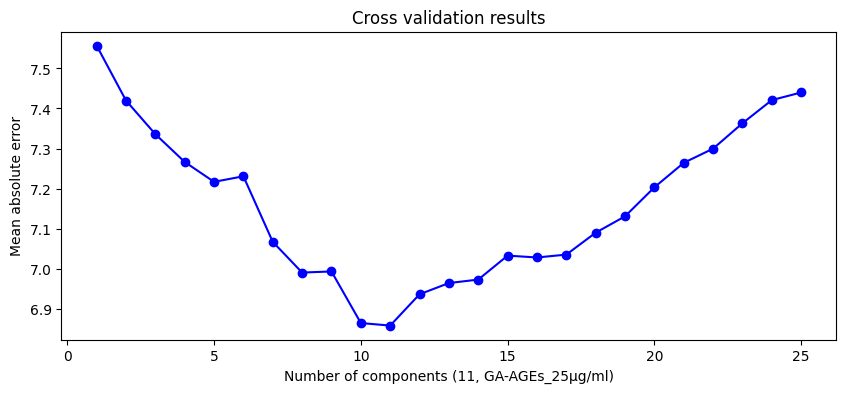

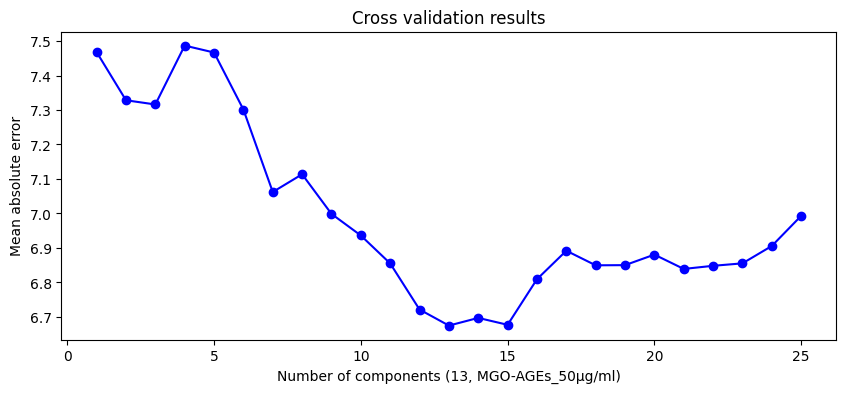

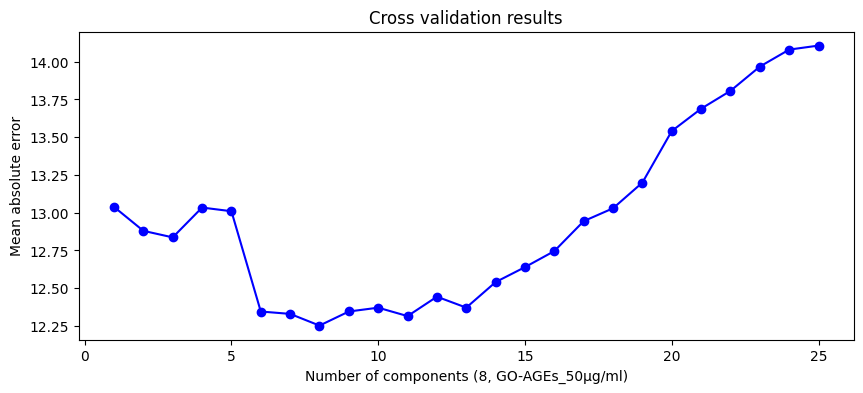

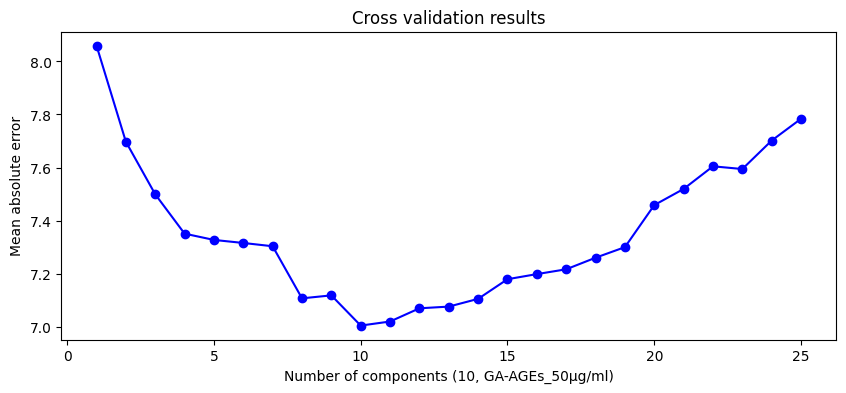

In [47]:
# import the PLSRegression and GridSearchCV classes
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

# instanciate a PLSRegression object
pls = PLSRegression(scale=False)

# define the parameter grid (number of components to evaluate)
param_grid = {'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                               11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                               21, 22, 23, 24, 25]}

# create a grid search object
grid_search = GridSearchCV(pls, param_grid, cv=10, scoring='neg_mean_absolute_error')

for key, sets in split_set.items():
    print("\n%s"%(key))
    try :
      # fit the grid search object to the data
      grid_search.fit(spc_preprocess, sets[2])

      # print the best parameters and score
      print("Best parameters: ", grid_search.best_params_)
      print("Best score: ", round(np.abs(grid_search.best_score_),3))
      fig, ax = plt.subplots(figsize=(10, 4))
      ax.plot(param_grid['n_components'], np.abs(grid_search.cv_results_['mean_test_score']), marker='o', color='b')
      ax.set_xlabel('Number of components (%s, %s)'%(grid_search.best_params_['n_components'], key))
      ax.set_ylabel('Mean absolute error')
      ax.set_title('Cross validation results')
      print(ax)
    except ValueError:
      print("ValueError %s"%(key))
      # fit the grid search object to the data
      grid_search.fit(spc_preprocess, sets[2].fillna(0))

      # print the best parameters and score
      print("Best parameters: ", grid_search.best_params_)
      print("Best score: ", round(np.abs(grid_search.best_score_),3))
      fig, ax = plt.subplots(figsize=(10, 4))
      ax.plot(param_grid['n_components'], np.abs(grid_search.cv_results_['mean_test_score']), marker='o', color='b')
      ax.set_xlabel('Number of components (%s, %s)'%(grid_search.best_params_['n_components'], key))
      ax.set_ylabel('Mean absolute error')
      ax.set_title('Cross validation results')
      print(ax)


### End of conduct
go to 2_PLS_regress.ipynb

In [ ]:
pls = PLSRegression(n_components=10)
print(cross_validate(pls, X, y, scoring = 'neg_mean_squared_error', cv = kf))

{'fit_time': array([0.0938127 , 0.01014948, 0.00915456, 0.01053619, 0.00862241]), 'score_time': array([0.0019989 , 0.00212359, 0.00200057, 0.00151706, 0.00199771]), 'test_score': array([-345.2081557 , -364.16073274, -309.94461443, -335.36983775,
       -390.9346513 ])}


In [ ]:
# !pip install chemotools
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from chemotools.baseline import AirPls
from chemotools.scatter import MultiplicativeScatterCorrection

preprocessing = make_pipeline(AirPls(), MultiplicativeScatterCorrection(), StandardScaler(with_std=False))
spectra_transformed = preprocessing.fit_transform(data_dict['X_train'])
spectra_transformed

Define a help function to compute the Standard Normal Variate correction to the spectra

Define functions to standardize the data in columns
- Define a couple of help functions
- Function to standardize a data set column-wise

Custom function to compute grad-CAM scores